In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chain_rg_ree=pd.read_csv('varying_interval_master_out.csv')
chain_rg_ree['Rend2']=chain_rg_ree.Rendx+chain_rg_ree.Rendy+chain_rg_ree.Rendz
chain_rg_ree['Rg2']=chain_rg_ree.Rgx+chain_rg_ree.Rgy+chain_rg_ree.Rgz
chain_rg_ree['ratio']=chain_rg_ree.Rend2.values/chain_rg_ree.Rg2.values
chain_rg_ree['asphericity']=chain_rg_ree.Rgx.values-(0.5*(chain_rg_ree.Rgy.values+chain_rg_ree.Rgz.values))
chain_rg_ree['acylindricity']=chain_rg_ree.Rgy.values-chain_rg_ree.Rgz.values
chain_rg_ree['RSA']=((chain_rg_ree.asphericity.values**2+(0.75*chain_rg_ree.acylindricity.values**2))/(chain_rg_ree.Rg2.values)**2)**0.5


In [3]:
def cum_mean(arr):
    cum_sum = np.cumsum(arr, axis=0)    
    for i in range(cum_sum.shape[0]):       
        if i == 0:
            continue        
        cum_sum[i] =  cum_sum[i] / (i + 1)
    return cum_sum


In [4]:
def running_mse(arr):
    mse=[]
    for i in range(arr.shape[0]):
        if i==0:
            difference_array = np.subtract(arr[i+1], arr[0])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())            
        else:
            difference_array = np.subtract(arr[i], arr[i-1])
            squared_array = np.square(difference_array)
            mse.append(squared_array.mean())
    return mse    

In [32]:
#measure lsx/Rg = 1.5Rg
#change to random walk, by something to do with beads

# check what the data look like. make sure the frames are equilibrated

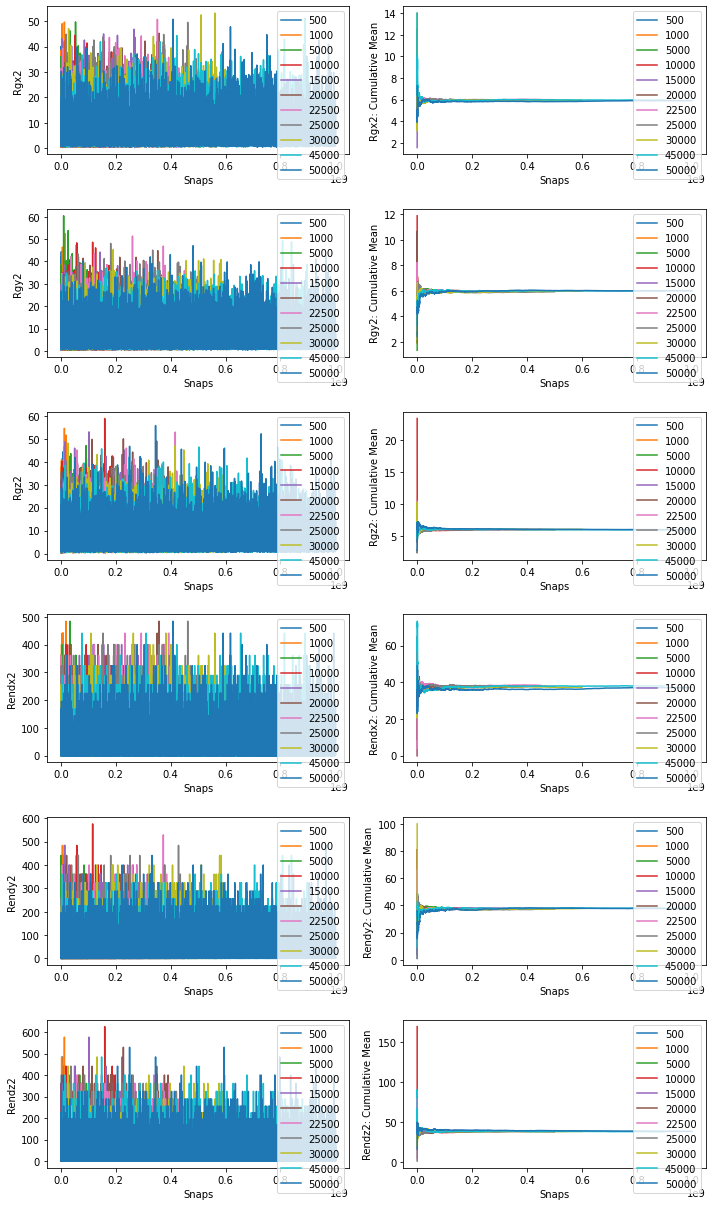

In [5]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,17))
chain_length = chain_rg_ree.chain_length.unique()
for chain_length in chain_length:
    ax[0,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,
                label=str(chain_length))
    ax[0,0].set_ylabel('Rgx2')
    ax[0,0].set_xlabel('Snaps')
    ax[0,0].legend()
    ax[0,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values),
                label=str(chain_length))
    ax[0,1].set_xlabel('Snaps')
    ax[0,1].set_ylabel('Rgx2: Cumulative Mean')
    ax[0,1].legend()
    ax[1,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values,
                label=str(chain_length))
    ax[1,0].set_ylabel('Rgy2')
    ax[1,0].set_xlabel('Snaps')
    ax[1,0].legend()
    ax[1,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgy.values),
                label=str(chain_length))
    ax[1,1].set_xlabel('Snaps')
    ax[1,1].set_ylabel('Rgy2: Cumulative Mean')
    ax[1,1].legend()
    ax[2,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values,
                label=str(chain_length))
    ax[2,0].set_ylabel('Rgz2')
    ax[2,0].set_xlabel('Snaps')
    ax[2,0].legend()
    ax[2,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgz.values),
                label=str(chain_length))
    ax[2,1].set_xlabel('Snaps')
    ax[2,1].set_ylabel('Rgz2: Cumulative Mean')
    ax[2,1].legend()
    ax[3,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values,
                label=str(chain_length))
    ax[3,0].set_ylabel('Rendx2')
    ax[3,0].set_xlabel('Snaps')
    ax[3,0].legend()
    ax[3,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendx.values),
                label=str(chain_length))
    ax[3,1].set_xlabel('Snaps')
    ax[3,1].set_ylabel('Rendx2: Cumulative Mean')
    ax[3,1].legend()
    ax[4,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values,
                label=str(chain_length))
    ax[4,0].set_ylabel('Rendy2')
    ax[4,0].set_xlabel('Snaps')
    ax[4,0].legend()
    ax[4,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendy.values),
                label=str(chain_length))
    ax[4,1].set_xlabel('Snaps')
    ax[4,1].set_ylabel('Rendy2: Cumulative Mean')
    ax[4,1].legend()
    ax[5,0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values,
                label=str(chain_length))
    ax[5,0].set_ylabel('Rendz2')
    ax[5,0].set_xlabel('Snaps')
    ax[5,0].legend()
    ax[5,1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                cum_mean(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rendz.values),
                label=str(chain_length))
    ax[5,1].set_xlabel('Snaps')
    ax[5,1].set_ylabel('Rendz2: Cumulative Mean')
    ax[5,1].legend()
plt.tight_layout()

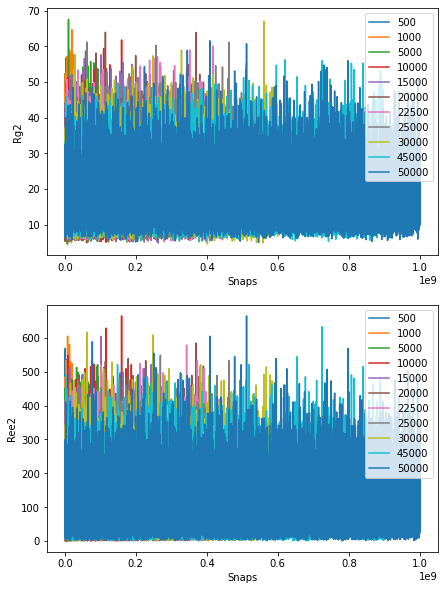

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7,10))
chain_length = chain_rg_ree.chain_length.unique()
for chain_length in chain_length:
    ax[0].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rg2.values,
                label=str(chain_length))
    ax[0].set_ylabel('Rg2')
    ax[0].set_xlabel('Snaps')
    ax[0].legend()
    ax[1].plot(chain_rg_ree[chain_rg_ree.chain_length==chain_length].frames.values,
                chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rend2.values,
                label=str(chain_length))
    ax[1].set_ylabel('Ree2')
    ax[1].set_xlabel('Snaps')
    ax[1].legend()    


In [7]:
# make sure to manually add ONLY the relevant/working chain length from chain_rg_ree in this below chain length list
chain_lengths_considered = chain_rg_ree.chain_length.unique()
#chain_lengths_considered = [200,2000,10000,15000,200000]
blank_df = pd.DataFrame()
for chain_length in chain_rg_ree.chain_length.unique():
    if chain_length in chain_lengths_considered:
        frames_number=len(chain_rg_ree[chain_rg_ree.chain_length==chain_length].index)
        equil_frames=int(0.50*frames_number)
        temp_df = chain_rg_ree[chain_rg_ree.chain_length==chain_length].iloc[-equil_frames:,:]
        blank_df = blank_df.append(temp_df)
equil_chain_rg_ree=blank_df.copy()
del blank_df, temp_df

mean=  5.912848492249948 for run =  500 std=  2.6689583584027297 error =  0.026682913689237645
mean=  5.969808854741355 for run =  1000 std=  2.6823360149478153 error =  0.02681665682308347
mean=  5.981616046098731 for run =  5000 std=  2.670240848575702 error =  0.02669573538594377
mean=  5.959714717621388 for run =  10000 std=  2.6936257938369867 error =  0.026929526398107723
mean=  5.9352929268236645 for run =  15000 std=  2.6722959464132656 error =  0.026716281228500664
mean=  5.990146017510629 for run =  20000 std=  2.7117438200143513 error =  0.0271106613817945
mean=  2.3903385973344276 for run =  22500 std=  1.6572755743960212 error =  0.016568614108072983
mean=  2.4266532918547234 for run =  25000 std=  1.6858617407236605 error =  0.016854404332721926
mean=  2.3980993064629663 for run =  30000 std=  1.6711035852862466 error =  0.016706859659906374
mean=  2.380283018656298 for run =  45000 std=  1.6576278388504582 error =  0.016572135872286328
mean=  2.406820286995765 for run = 

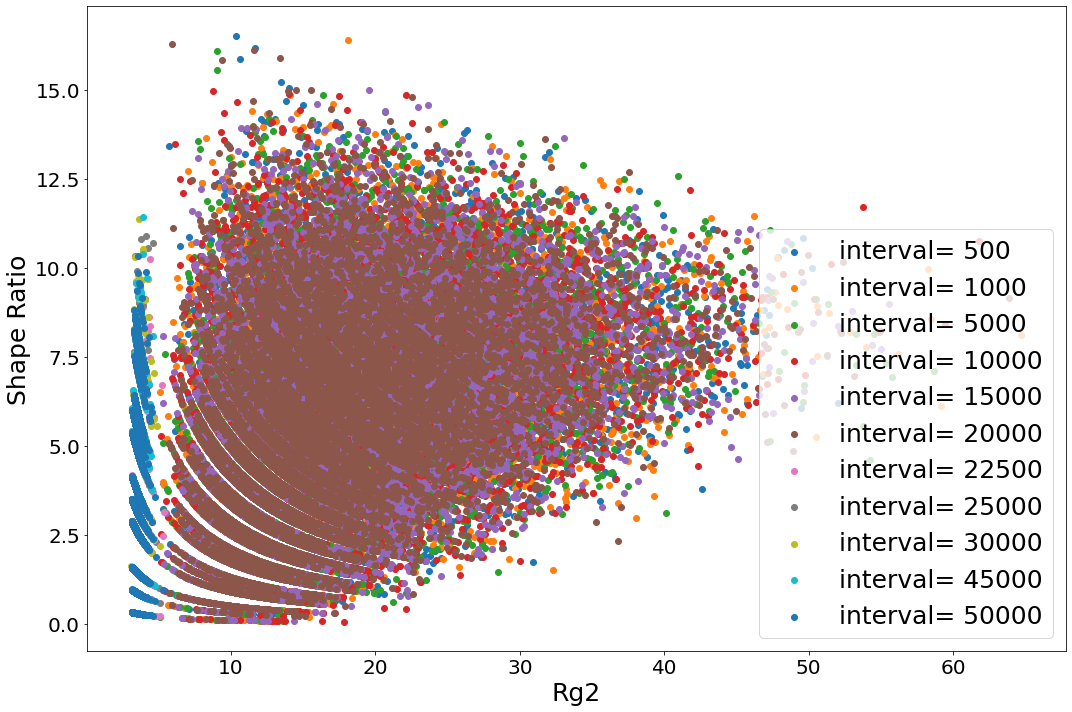

In [8]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='lower right')
ax.set_xlabel('Rg2',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_xlim(0,70)
#ax.set_ylim(0,16)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


In [10]:
equil_chain_rg_ree[equil_chain_rg_ree.chain_length==50000].ratio.mean()

2.406820286995765

mean=  5.918599834683446 for run =  500 std=  2.612049943630076 error =  0.036932578781522896
mean=  17.978999280287887 for run =  500 std=  7.021017674435703 error =  0.099272331687194
mean=  6.038399454580191 for run =  20000 std=  2.7212991271005644 error =  0.03847728664026064
mean=  17.986923630547782 for run =  20000 std=  7.06999924403951 error =  0.09996489718834255


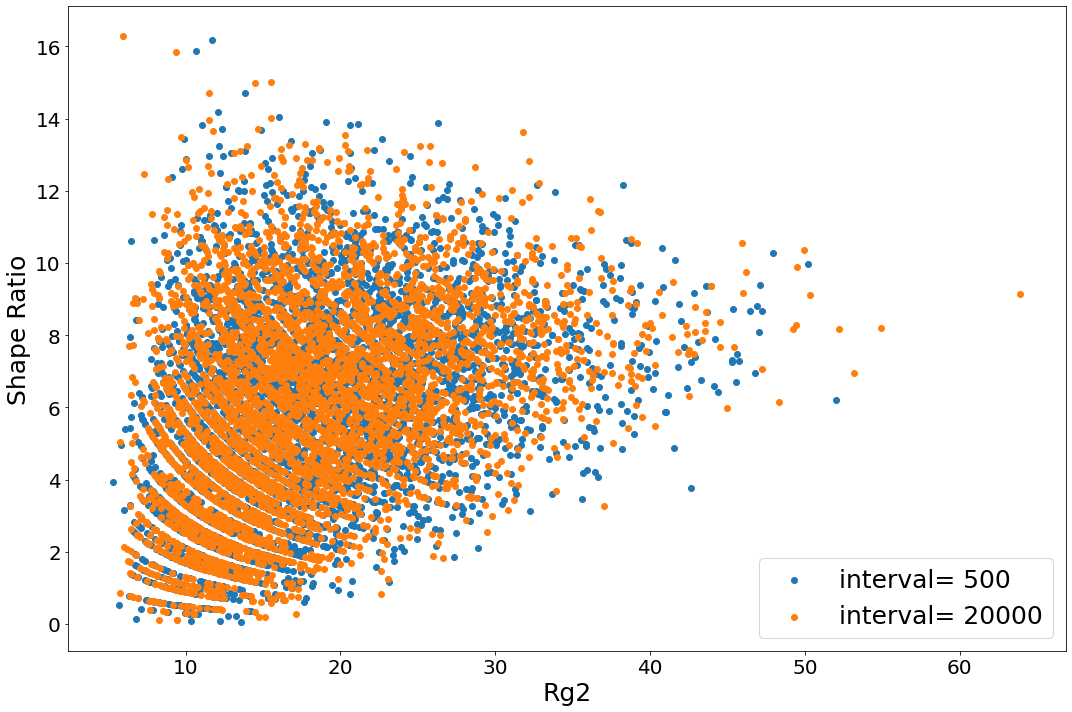

In [18]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
i=500
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
        label='interval= '+str(i))
print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
i=20000
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
        label='interval= '+str(i))
print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)

ax.legend(fontsize=25,loc='lower right')
ax.set_xlabel('Rg2',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_xlim(0,70)
#ax.set_ylim(0,16)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


Ratio mean=  5.918599834683446 for run =  500 std=  2.612049943630076 error =  0.036932578781522896
Rg2 mean=  17.978999280287887 for run =  500 std=  7.021017674435703 error =  0.099272331687194
Ratio mean=  6.038399454580191 for run =  20000 std=  2.7212991271005644 error =  0.03847728664026064
Rg2 mean=  17.986923630547782 for run =  20000 std=  7.06999924403951 error =  0.09996489718834255


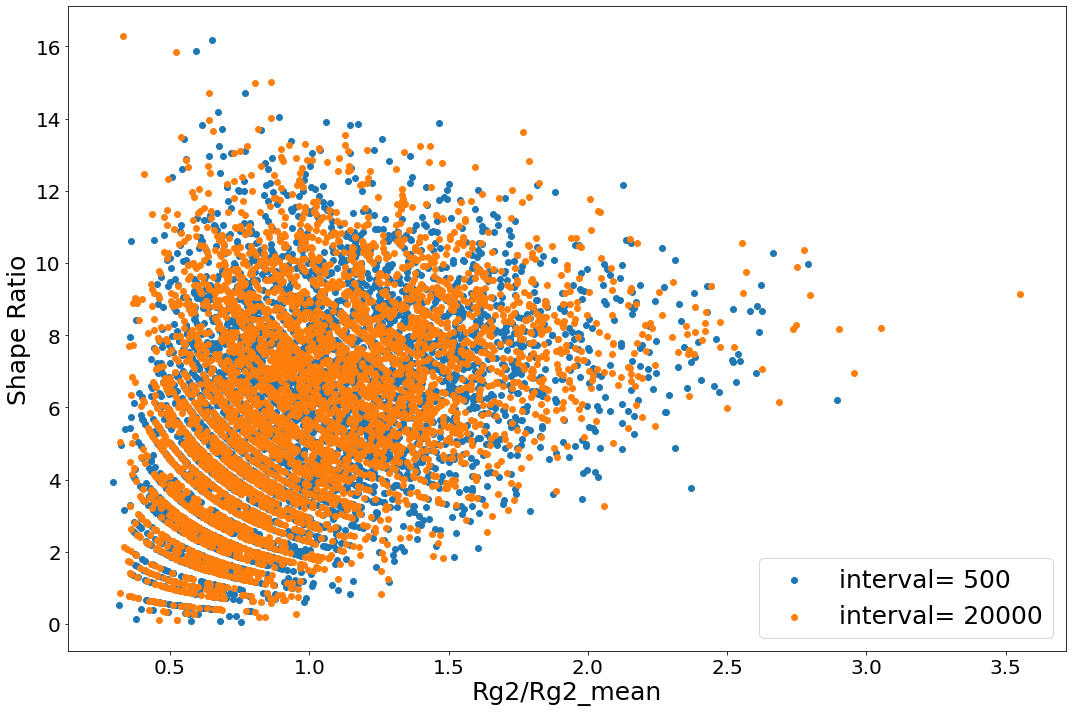

In [23]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
i=500
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.mean(),
            equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
        label='interval= '+str(i))
print('Ratio mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('Rg2 mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
i=20000
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.mean(),
            equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
        label='interval= '+str(i))
print('Ratio mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('Rg2 mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)

ax.legend(fontsize=25,loc='lower right')
ax.set_xlabel('Rg2/Rg2_mean',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_xlim(0,70)
#ax.set_ylim(0,16)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


Ratio mean=  5.918599834683446 for run =  500 std=  2.612049943630076 error =  0.036932578781522896
Rg2 mean=  17.978999280287887 for run =  500 std=  7.021017674435703 error =  0.099272331687194
Ratio mean=  6.038399454580191 for run =  20000 std=  2.7212991271005644 error =  0.03847728664026064
Rg2 mean=  17.986923630547782 for run =  20000 std=  7.06999924403951 error =  0.09996489718834255


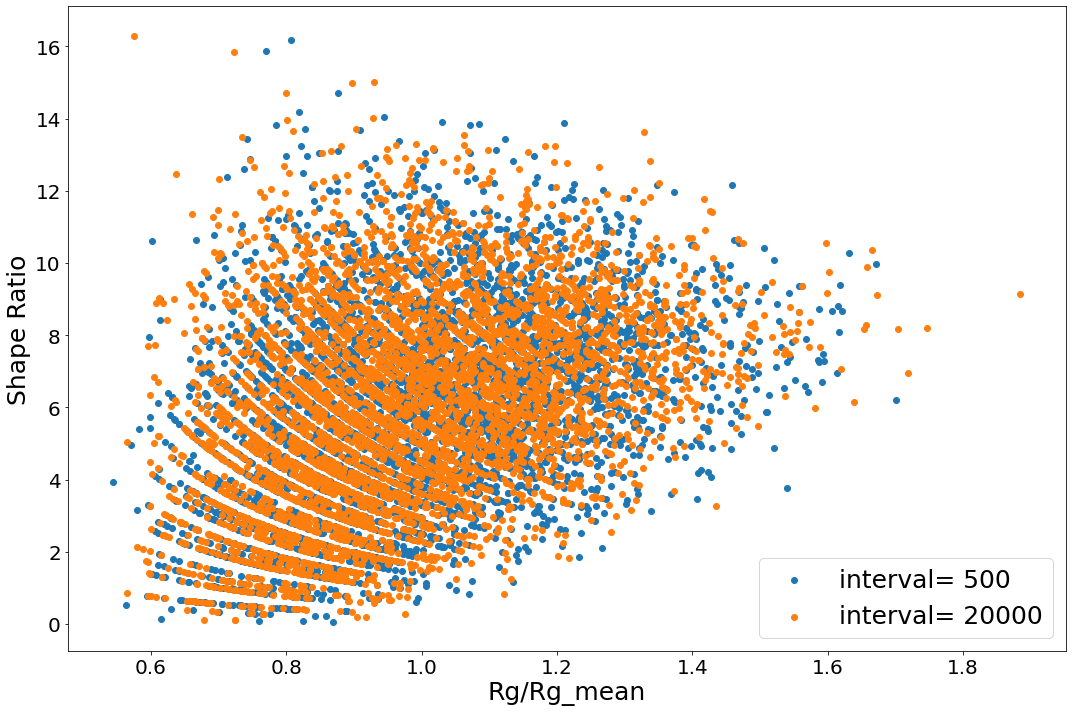

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
i=500
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values**0.5/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.mean()**0.5,
            equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
        label='interval= '+str(i))
print('Ratio mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('Rg2 mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
i=20000
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values**0.5/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.mean()**0.5,
            equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
        label='interval= '+str(i))
print('Ratio mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('Rg2 mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)

ax.legend(fontsize=25,loc='lower right')
ax.set_xlabel('Rg/Rg_mean',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_xlim(0,70)
#ax.set_ylim(0,16)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


Text(30000, 6.1, 'Chain Length= 50')

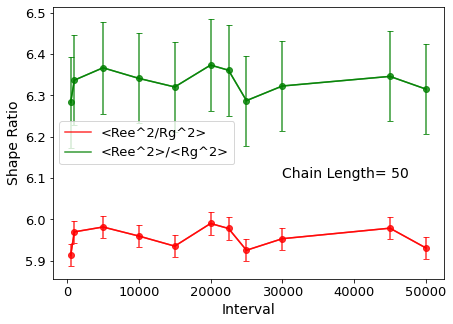

In [20]:
#pay attention to first and second definitions
plt.figure(figsize=(7,5))
x_axis=[]
ratio_1stdef=[]  #'<Ree^2/Rg^2>'
ratio_1sterr=[]  #'<Ree^2/Rg^2>'
ratio_2nddef=[]  #'<Ree^2>/<Rg^2>'
ratio_2nderr=[]  #'<Ree^2>/<Rg^2>'
for i in equil_chain_rg_ree.chain_length.unique():
    x_axis.append(i)
    ratio_1stdef.append(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio.mean())
    ratio_1sterr.append(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames)**0.5)    
    ratio_2nddef.append(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rend2.mean()/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.mean())
    ratio_2nderr.append((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rend2.std()/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.std())/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].frames)**0.5)
    
plt.plot(x_axis,ratio_1stdef,label='<Ree^2/Rg^2>',color='red',alpha=0.8)        
plt.plot(x_axis,ratio_2nddef,label='<Ree^2>/<Rg^2>',color='green',alpha=0.8)
plt.legend(fontsize=13,loc='center left')
plt.scatter(x_axis,ratio_1stdef,label='<Ree^2/Rg^2>',color='red',alpha=0.8) 
plt.scatter(x_axis,ratio_2nddef,label='<Ree^2>/<Rg^2>',color='green',alpha=0.8)
plt.errorbar(x_axis,ratio_1stdef,color='red',alpha=0.8,yerr=ratio_1sterr,capsize=3) 
plt.errorbar(x_axis,ratio_2nddef,color='green',alpha=0.8,yerr=ratio_2nderr,capsize=3)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Interval',fontsize=14)
plt.ylabel('Shape Ratio',fontsize=14)
#plt.text(30000,6.1,'Chain Length= 50',fontsize=14)
#PAY ATTENTION TO BELOW DETAILS!!
#     print('interval= ',i,'Ratio mean <Ree^2/Rg^2>',
#           equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio.mean(),
#           equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio.std())
#     print('interval= ',i,'<Ree^2>/<Rg^2>',
#           equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rend2.mean()/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].Rg2.mean(),
#           equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].ratio.std()) 
    

In [32]:
equil_chain_rg_ree

,frames,chain_length,econf,Rgx,Rgy,Rgz,Rendx,Rendy,Rendz,Rend2,Rg2,ratio,asphericity,acylindricity,RSA
10005,5003000,500,0.0,3.4096,14.6356,2.9376,25.0,121.0,25.0,171.0,20.9828,8.149532,-5.3770,11.6980,0.546604
10006,5003500,500,0.0,1.0164,9.8100,3.9924,1.0,49.0,9.0,59.0,14.8188,3.981429,-5.8848,5.8176,0.522774
10007,5004000,500,0.0,5.5856,4.9924,1.8800,9.0,49.0,9.0,67.0,12.4580,5.378070,2.1494,3.1124,0.276729
10008,5004500,500,0.0,9.8244,8.6336,2.7824,64.0,36.0,49.0,149.0,21.2404,7.014934,4.1164,5.8512,0.307365
10009,5005000,500,0.0,8.9044,2.3104,1.5296,49.0,49.0,1.0,99.0,12.7444,7.768118,6.9844,0.7808,0.550599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220105,1000300000,50000,0.0,0.9700,11.2000,1.3984,1.0,121.0,9.0,131.0,13.5684,9.654786,-5.3292,9.8016,0.738677
220106,1000350000,50000,0.0,9.5300,3.1616,2.4304,81.0,4.0,4.0,89.0,15.1220,5.885465,6.7340,0.7312,0.447276
220107,1000400000,50000,0.0,14.6084,1.8736,2.7056,144.0,1.0,0.0,145.0,19.1876,7.556964,12.3188,-0.8320,0.643116
220108,1000450000,50000,0.0,3.0816,2.6564,11.2256,16.0,36.0,49.0,101.0,16.9636,5.953925,-3.8594,-8.5692,0.493098


Ratio mean=  5.918599834683446 for run =  500 std=  2.612049943630076 error =  0.036932578781522896
Rg2 mean=  17.978999280287887 for run =  500 std=  7.021017674435703 error =  0.099272331687194
Ratio mean=  6.038399454580191 for run =  20000 std=  2.7212991271005644 error =  0.03847728664026064
Rg2 mean=  17.986923630547782 for run =  20000 std=  7.06999924403951 error =  0.09996489718834255


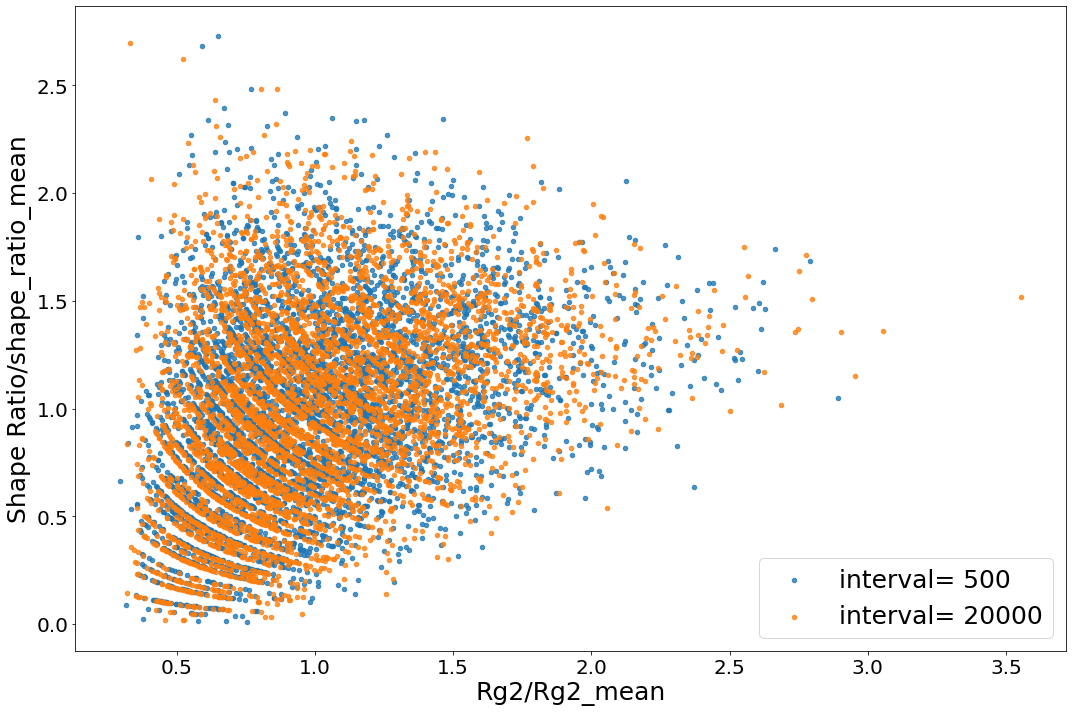

In [27]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
i=500
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.mean(),
            equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values/5.92,
        label='interval= '+str(i),alpha=0.8,s=20)
print('Ratio mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('Rg2 mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
i=20000
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values/equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.mean(),
            equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values/6.04,
        label='interval= '+str(i),alpha=0.8,s=20)
print('Ratio mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
print('Rg2 mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].Rg2.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)

ax.legend(fontsize=25,loc='lower right')
ax.set_xlabel('Rg2/Rg2_mean',fontsize=25)
ax.set_ylabel('Shape Ratio/shape_ratio_mean',fontsize=25)
#ax.set_xlim(0,70)
#ax.set_ylim(0,16)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


mean=  6.038399454580191 for run =  20000 std=  2.7212991271005644 error =  0.03847728664026064


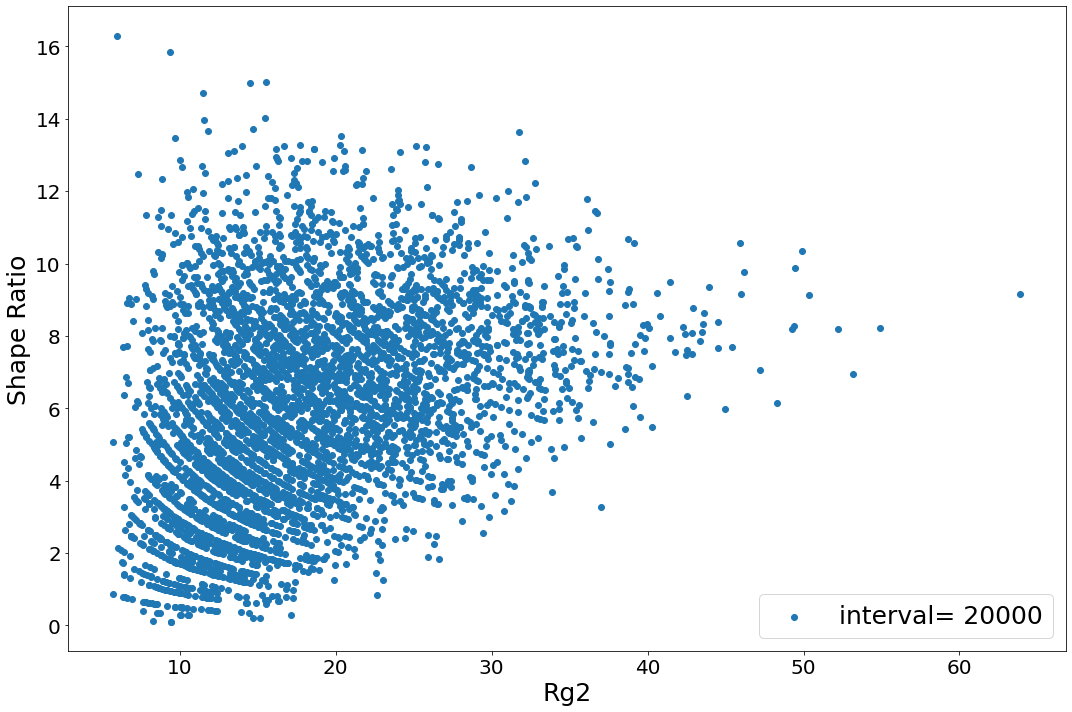

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
i=20000
ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
        label='interval= '+str(i))
print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='lower right')
ax.set_xlabel('Rg2',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_xlim(0,70)
#ax.set_ylim(0,16)
ax.set_title('')
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


mean=  5.918599834683446 for run =  500 std=  2.612049943630076 error =  0.036932578781522896
mean=  5.9865208778682 for run =  1000 std=  2.7048211473131585 error =  0.03824429940808967
mean=  6.028524807553063 for run =  5000 std=  2.6705333059113303 error =  0.03775949305631621
mean=  5.947699577496021 for run =  10000 std=  2.7232030296386287 error =  0.038504206504733705
mean=  5.896536528407399 for run =  15000 std=  2.6714935090162655 error =  0.037773069663802505
mean=  6.038399454580191 for run =  20000 std=  2.7212991271005644 error =  0.03847728664026064


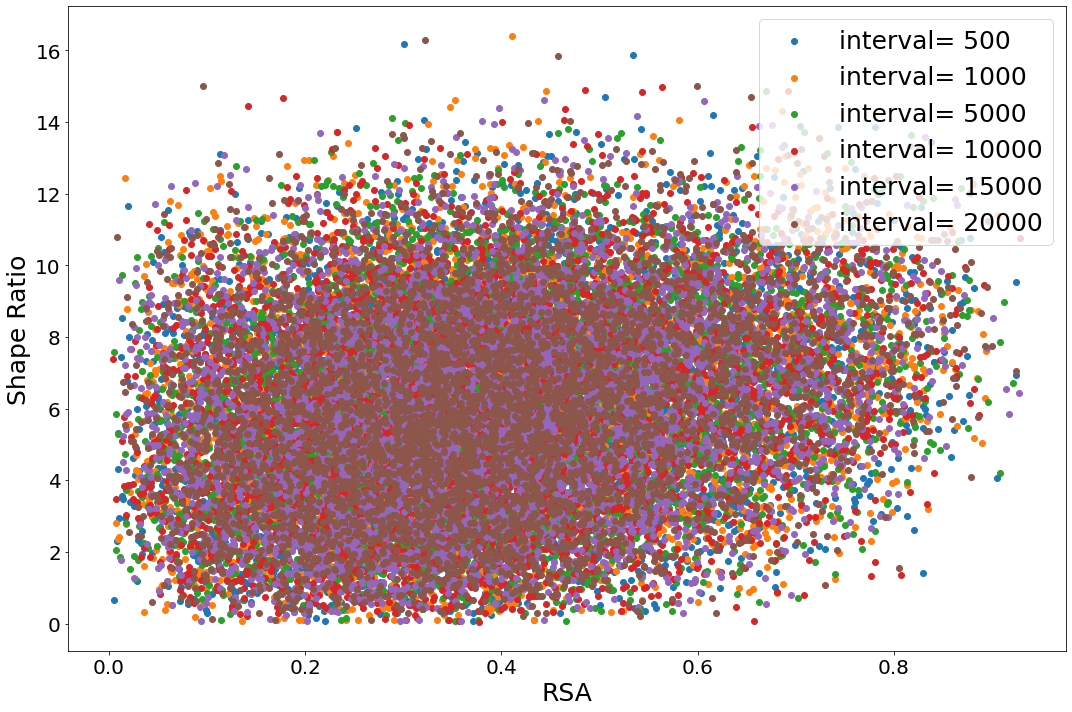

In [10]:
fig,ax = plt.subplots(figsize=(15,10))
every_ith_frame=1
for i in equil_chain_rg_ree.chain_length.unique():
    ax.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].RSA.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='interval= '+str(i))
    print('mean= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.mean(),'for run = ',str(i),'std= ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std(),'error = ',equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.std()/len(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].frames)**0.5)
ax.legend(fontsize=25,loc='upper right')
ax.set_xlabel('RSA',fontsize=25)
ax.set_ylabel('Shape Ratio',fontsize=25)
#ax.set_ylim(0,15)
#ax.set_xlim(0,1)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()


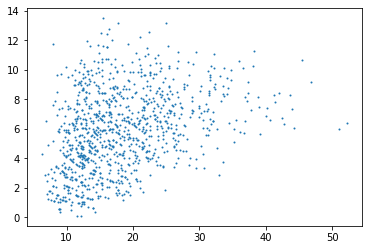

In [34]:
i='2nd'
every_ith_frame=5
plt.scatter(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame,:].Rg2.values,equil_chain_rg_ree[equil_chain_rg_ree.chain_length==i].iloc[::every_ith_frame].ratio.values,
            label='seed= '+str(i),s=1)


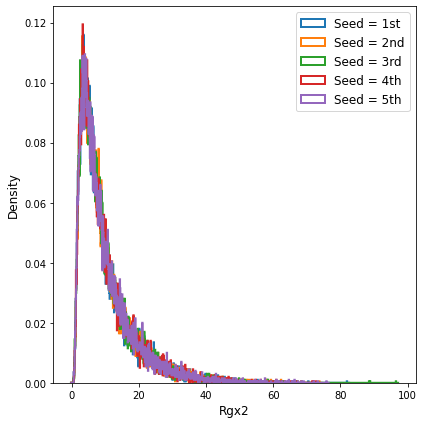

In [15]:
fig = plt.subplots(figsize=(6,6))
for chain_length in chain_rg_ree.chain_length.unique():
    plt.hist(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange(chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values.min()-1,
                                        chain_rg_ree[chain_rg_ree.chain_length==chain_length].Rgx.values.max()+1,0.1),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rgx2",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


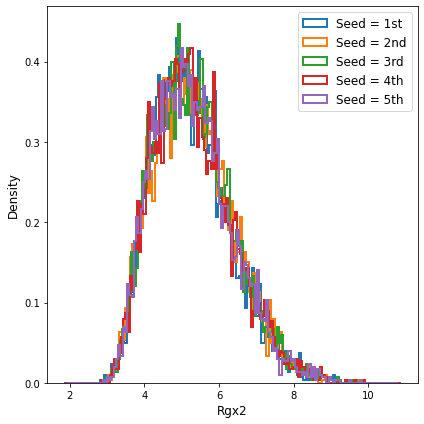

In [21]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rg2.values**0.5).max()+1,0.06),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Rgx2",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


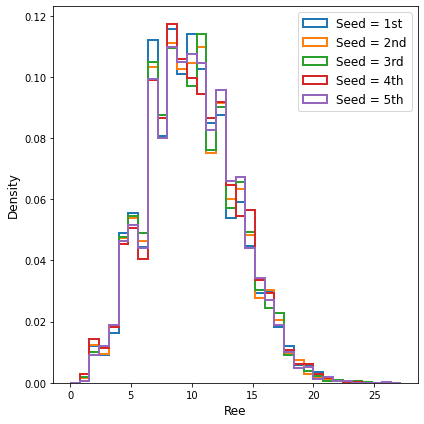

In [27]:
fig = plt.subplots(figsize=(6,6))
for chain_length in equil_chain_rg_ree.chain_length.unique():
    plt.hist(equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5,
             label='Seed = '+str(chain_length),
             histtype='step',linestyle=('solid'),
             density=True,bins=np.arange((equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).min()-1,
                                        (equil_chain_rg_ree[equil_chain_rg_ree.chain_length==chain_length].Rend2.values**0.5).max()+1,0.8),
    linewidth=2)
plt.legend(fontsize=12)
#plt.title('Ratio distribution',fontsize=25)
plt.xlabel("Ree",fontsize=12)
plt.ylabel("Density",fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


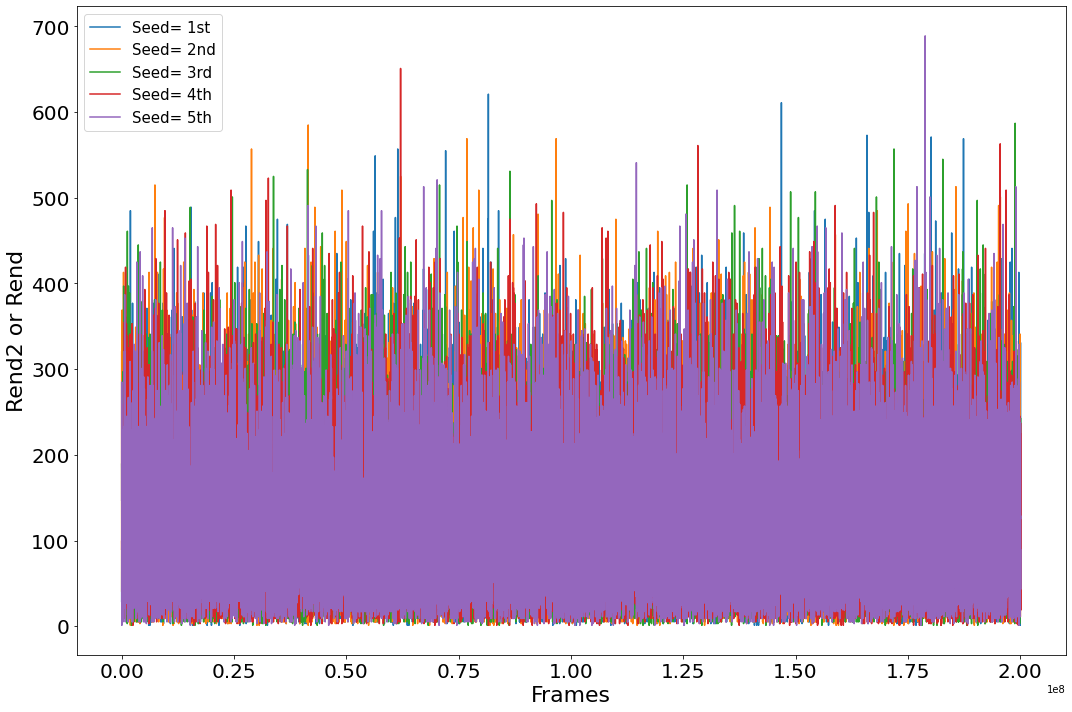

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
for i in chain_rg_ree.chain_length.unique():
    ax.plot(chain_rg_ree[chain_rg_ree.chain_length==i].frames.values,chain_rg_ree[chain_rg_ree.chain_length==i].Rend2.values,
            label='Seed= '+str(i))
ax.legend(fontsize=15)
ax.set_xlabel('Frames',fontsize=22)
ax.set_ylabel('Rend2 or Rend',fontsize=22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=20)
plt.tight_layout()

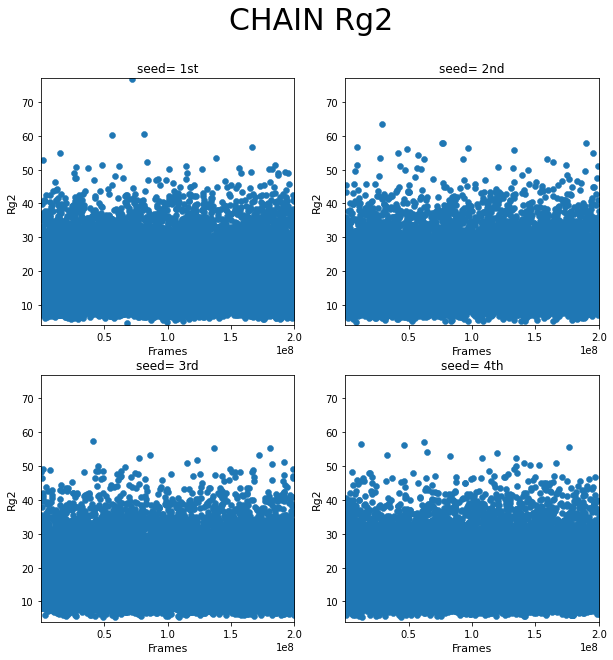

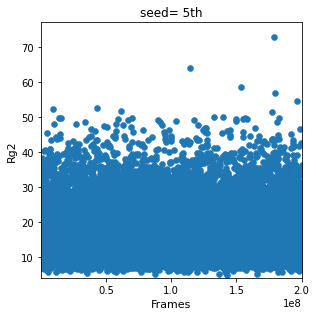

In [35]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
counter=0
states=chain_rg_ree.chain_length.unique()
for x_dim in range(1,axs.shape[0]+1):
    for y_dim in range(1,axs.shape[1]+1):
        if counter<len(states):
            axs[x_dim-1,y_dim-1].scatter(chain_rg_ree[chain_rg_ree.chain_length==states[counter]].frames.values,
                                         chain_rg_ree[chain_rg_ree.chain_length==states[counter]].Rg2.values,
                                      linewidth=0.5)
            axs[x_dim-1,y_dim-1].set_title('seed= '+str(states[counter]),fontsize=12)
            axs[x_dim-1,y_dim-1].set_ylabel('Rg2',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlabel('Frames',fontsize=11)
            axs[x_dim-1,y_dim-1].set_xlim(int(chain_rg_ree.frames.values.min()-2),int(chain_rg_ree.frames.values.max())+1)
            axs[x_dim-1,y_dim-1].set_ylim(int(chain_rg_ree.Rg2.values.min()),int(chain_rg_ree.Rg2.values.max())+1)
        counter+=1
fig.suptitle('CHAIN Rg2',fontsize=30)
fig, axs = plt.subplots(figsize=(4.5,4.5))
axs.scatter(chain_rg_ree[chain_rg_ree.chain_length=='5th'].frames.values,
                                         chain_rg_ree[chain_rg_ree.chain_length=='5th'].Rg2.values,
                                      linewidth=0.5)
axs.set_title('seed= 5th',fontsize=12)
axs.set_ylabel('Rg2',fontsize=11)
axs.set_xlabel('Frames',fontsize=11)
axs.set_xlim(int(chain_rg_ree.frames.values.min()-2),int(chain_rg_ree.frames.values.max())+1)
axs.set_ylim(int(chain_rg_ree.Rg2.values.min()),int(chain_rg_ree.Rg2.values.max())+1)
plt.tight_layout()
